In [96]:
import pandas as pd

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Описание датасета**

* **id**: уникальный идентификатор
* **Gender**: пол покупателя
* **Age**: Возраст покупателя
* **Driving_License**: Наличий водительских парв (1 - имеются, 0 - не имеются)
* **Region_Code**: Код региона пользователя
* **Previously_Insured**: Была ли страховка до этого (1 - была, 0 - не было)
* **Vehicle_Age**: Возраст автомобиля
* **Vehicle_Damage**: Было ли повреждение автомобиля в прошлом (1 - было, 0 - не было)
* **Annual_Premium**: Годовая стоимость подписки
* **Policy_Sales_Channel**: Анонимный код для различных каналов взаимодействия с клиентом
* **Vintage**: Количество дней, в течение которых клинт был связан со страховой компанией
* **Response**: Целевая переменная, указывающая на заитересованность клиента (1 - заинтересован, 0 - не заинтересован) 

**Чтение файла**


In [98]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('train.csv')

train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


**Наличие пропущенных строк**

In [99]:
print(f'Number of missing values in train_df:\n{train_df.isna().sum()}')
print(f'Number of missing values in test_df:\n{test_df.isna().sum()}')

Number of missing values in train_df:
id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64
Number of missing values in test_df:
id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


**Пустых строк не обнаружено**

Интформация о датасете

In [100]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999999 entries, 0 to 4999998
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 457.8+ MB


Вывод категориальных признаков и количество уникальных значений в них

In [101]:
categorical_columns = train_df.select_dtypes(include=['object']).columns
unique_counts = train_df[categorical_columns].nunique()
print(unique_counts)

Gender            2
Vehicle_Age       3
Vehicle_Damage    2
dtype: int64


Всего 3 категориальных признака *Gender*, *Vehicle_Age*, *Vehicle_Damage*

Посмотрим уникальные значения данных признаков

In [102]:
# Gender
print("Gender:", train_df["Gender"].unique())
# Vehicle_Age
print("Vehicle_Age:", train_df["Vehicle_Age"].unique())
# Vehicle_Damage
print("Vehicle_Damage:", train_df["Vehicle_Damage"].unique())

Gender: ['Male' 'Female']
Vehicle_Age: ['1-2 Year' '> 2 Years' '< 1 Year']
Vehicle_Damage: ['Yes' 'No']


Переведем категориальные признаки в числовые

* Gender
    + 'Male' - 1
    + 'Female' - 0

* Vehicle_Age
    + '< 1 Year' - 0
    + '1-2 Year' - 1
    + '> 2 Years' - 2

* Vehicle_Damage
    + 'No' - 0
    + 'Yes' - 1
    

In [103]:
#Gender
condition = [train_df['Gender'] == 'Male', train_df['Gender']=='Famale']
choices = [1, 0]
train_df['Gender'] = np.select(condition, choices)
test_df['Gender'] = np.select(condition, choices)

#Vehicle_Age
condition = [train_df['Vehicle_Age'] == '< 1 Year', train_df['Vehicle_Age']=='1-2 Year', train_df['Vehicle_Age']=='> 2 Years']
choices = [0, 1, 2]
train_df['Vehicle_Age'] = np.select(condition, choices)
test_df['Vehicle_Age'] = np.select(condition, choices)

#Vehicle_Damage
condition = [train_df['Vehicle_Damage'] == 'No', train_df['Vehicle_Damage']=='Yes']
choices = [0, 1]
train_df['Vehicle_Damage'] = np.select(condition, choices)
test_df['Vehicle_Damage'] = np.select(condition, choices)

In [104]:
# Gender
print("Gender:", train_df["Gender"].unique())
# Vehicle_Age
print("Vehicle_Age:", train_df["Vehicle_Age"].unique())
# Vehicle_Damage
print("Vehicle_Damage:", train_df["Vehicle_Damage"].unique())

Gender: [1 0]
Vehicle_Age: [1 2 0]
Vehicle_Damage: [1 0]


Избавимся от поля id в обучающей и тестовой выборке, так как это поле не несет в себе смысла

In [105]:
train_df = train_df.drop('id', axis=1)
test_df = test_df.drop('id', axis=1)
train_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,21,1,35.0,0,1,1,65101.0,124.0,187,0
1,1,43,1,28.0,0,2,1,58911.0,26.0,288,1
2,0,25,1,14.0,1,0,0,38043.0,152.0,254,0
3,0,35,1,1.0,0,1,1,2630.0,156.0,76,0
4,0,36,1,15.0,1,1,0,31951.0,152.0,294,0


Отобразим зависимость целевой от признаков

<Axes: xlabel='Gender', ylabel='count'>

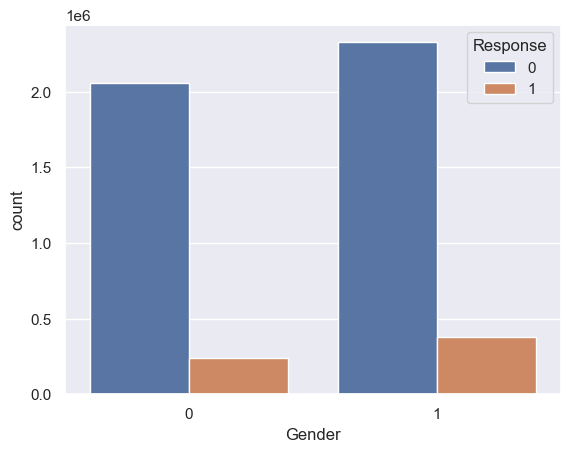

In [106]:
sns.countplot(data=train_df,x='Gender',hue='Response')

<Axes: xlabel='Driving_License', ylabel='count'>

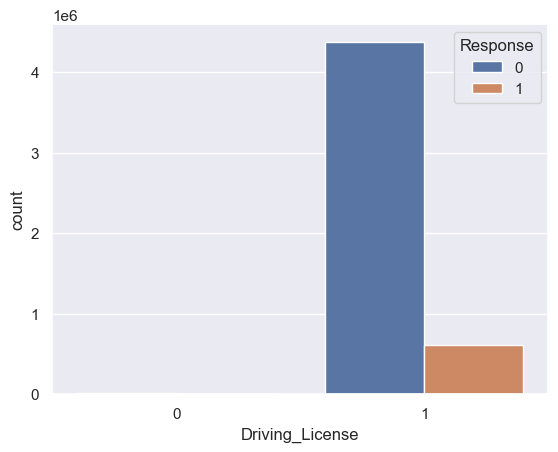

In [107]:
sns.countplot(data=train_df,x='Driving_License',hue='Response')

Text(0.5, 0, 'Response for Driving_License == 0')

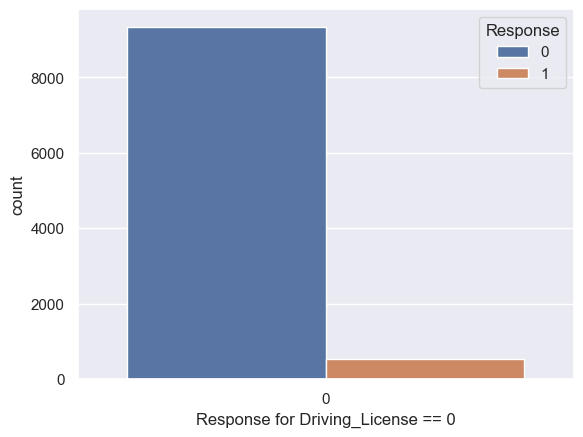

In [108]:
subset = train_df[train_df['Driving_License']==0]
sns.countplot(data=subset,x='Driving_License',hue='Response')
plt.xlabel('Response for Driving_License == 0')

<Axes: xlabel='Previously_Insured', ylabel='count'>

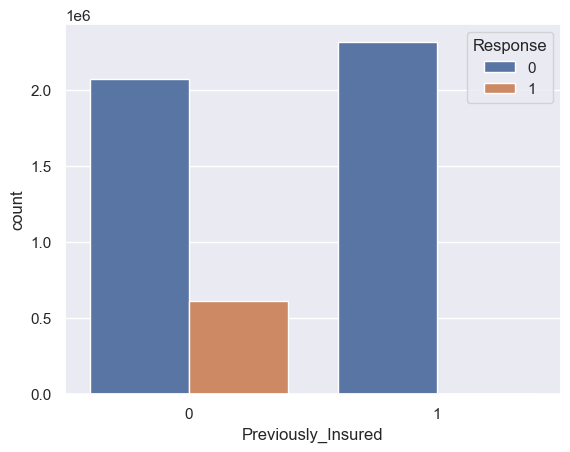

In [109]:
sns.countplot(data=train_df,x='Previously_Insured',hue='Response')

Text(0.5, 0, 'Vehicle Age (0: <1 Year, 1: 1-2 Years, 2: >2 Years)')

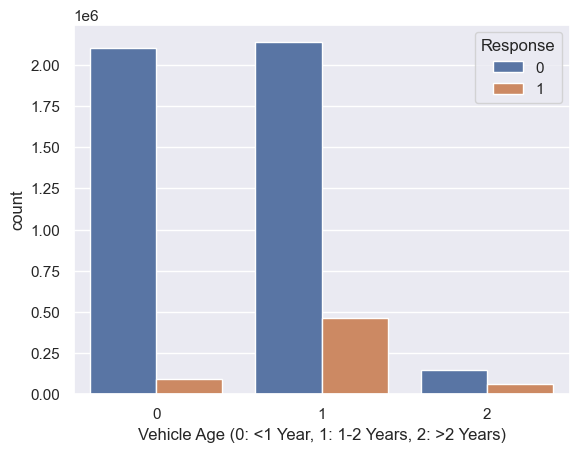

In [110]:
sns.countplot(data=train_df,x='Vehicle_Age',hue='Response')
plt.xlabel('Vehicle Age (0: <1 Year, 1: 1-2 Years, 2: >2 Years)')

Text(0.5, 0, 'Vehicle Damage (0: No, 1: Yes)')

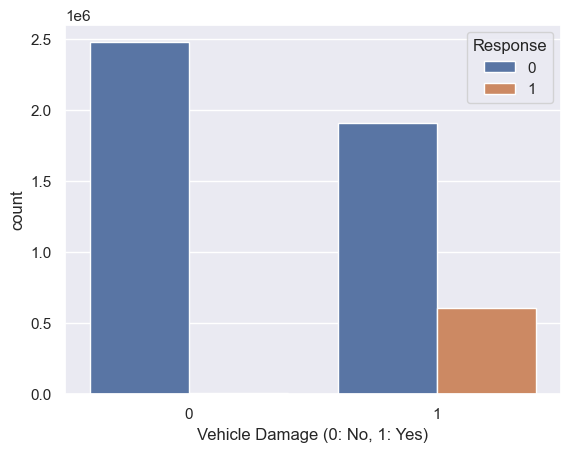

In [111]:
sns.countplot(data=train_df,x='Vehicle_Damage',hue='Response')
plt.xlabel('Vehicle Damage (0: No, 1: Yes)')

Text(0.5, 0, 'Age')

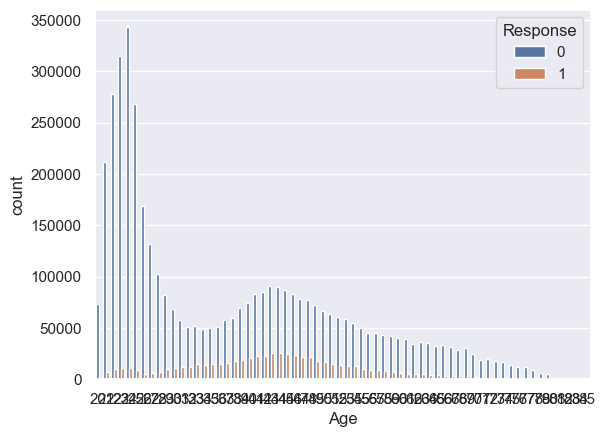

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

Соответсвует степенному распределению, можем избавиться от хвостов

<Axes: xlabel='Response', ylabel='Count'>

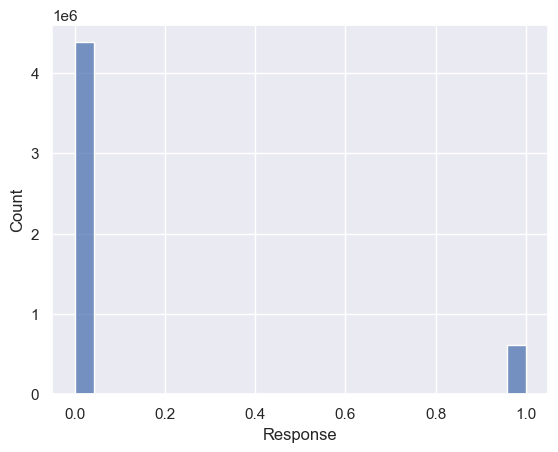

In [113]:
sns.histplot(data=train_df, x='Response')

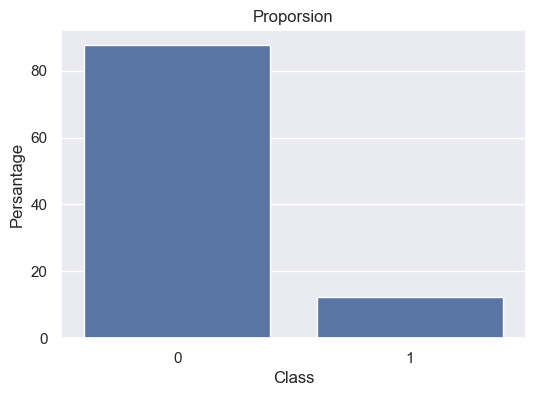

In [114]:
proporsion = train_df['Response'].value_counts(normalize=True)
plt.figure(figsize=(6,4))
sns.barplot(x=proporsion.index, y=proporsion.values * 100)
plt.title('Proporsion')
plt.xlabel('Class')
plt.ylabel('Persantage')
plt.show()

Text(0, 0.5, 'Policy Sales Channel')

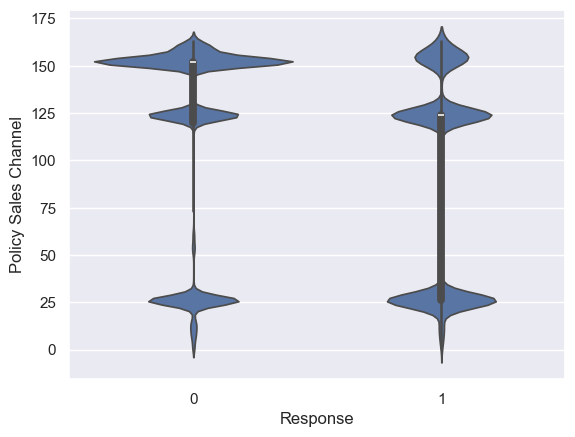

In [115]:
sns.violinplot(x='Response', y='Policy_Sales_Channel', data=train_df)
plt.ylabel("Policy Sales Channel")

Text(0, 0.5, 'Region Code')

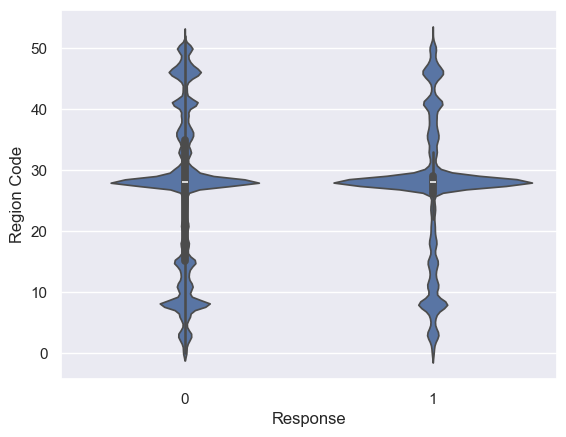

In [116]:
sns.violinplot(x='Response', y='Region_Code', data=train_df)
plt.ylabel("Region Code")

Матрица корреляций

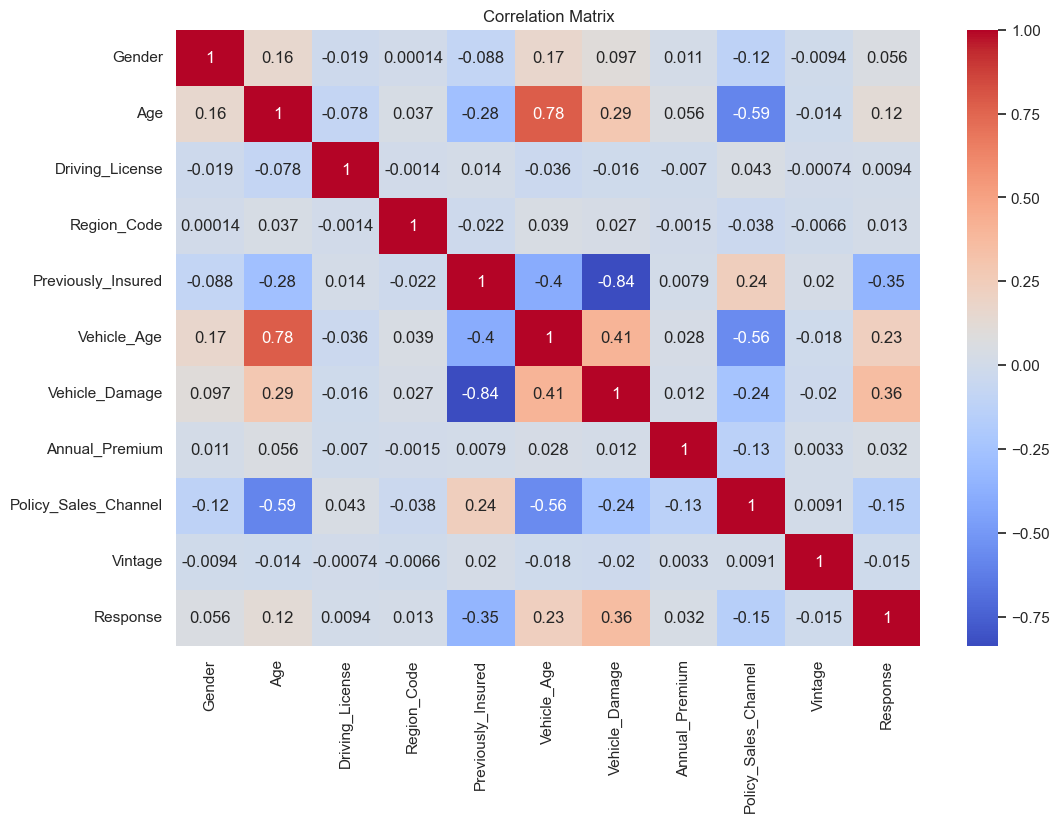

In [117]:
correlation_matrix = train_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Driving_License
1    4990131
0       9868
Name: count, dtype: int64

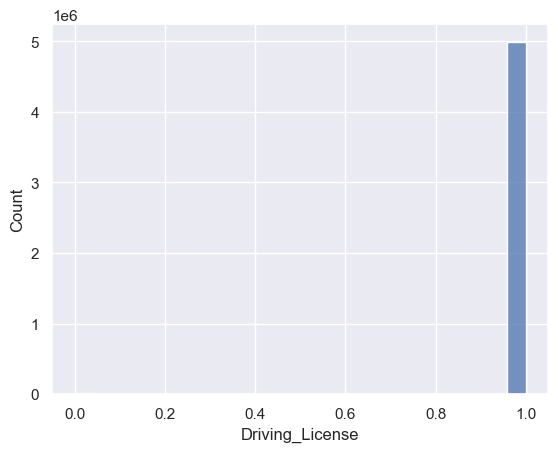

In [118]:
sns.histplot(data=train_df, x='Driving_License')
train_df['Driving_License'].value_counts()

Выбросы

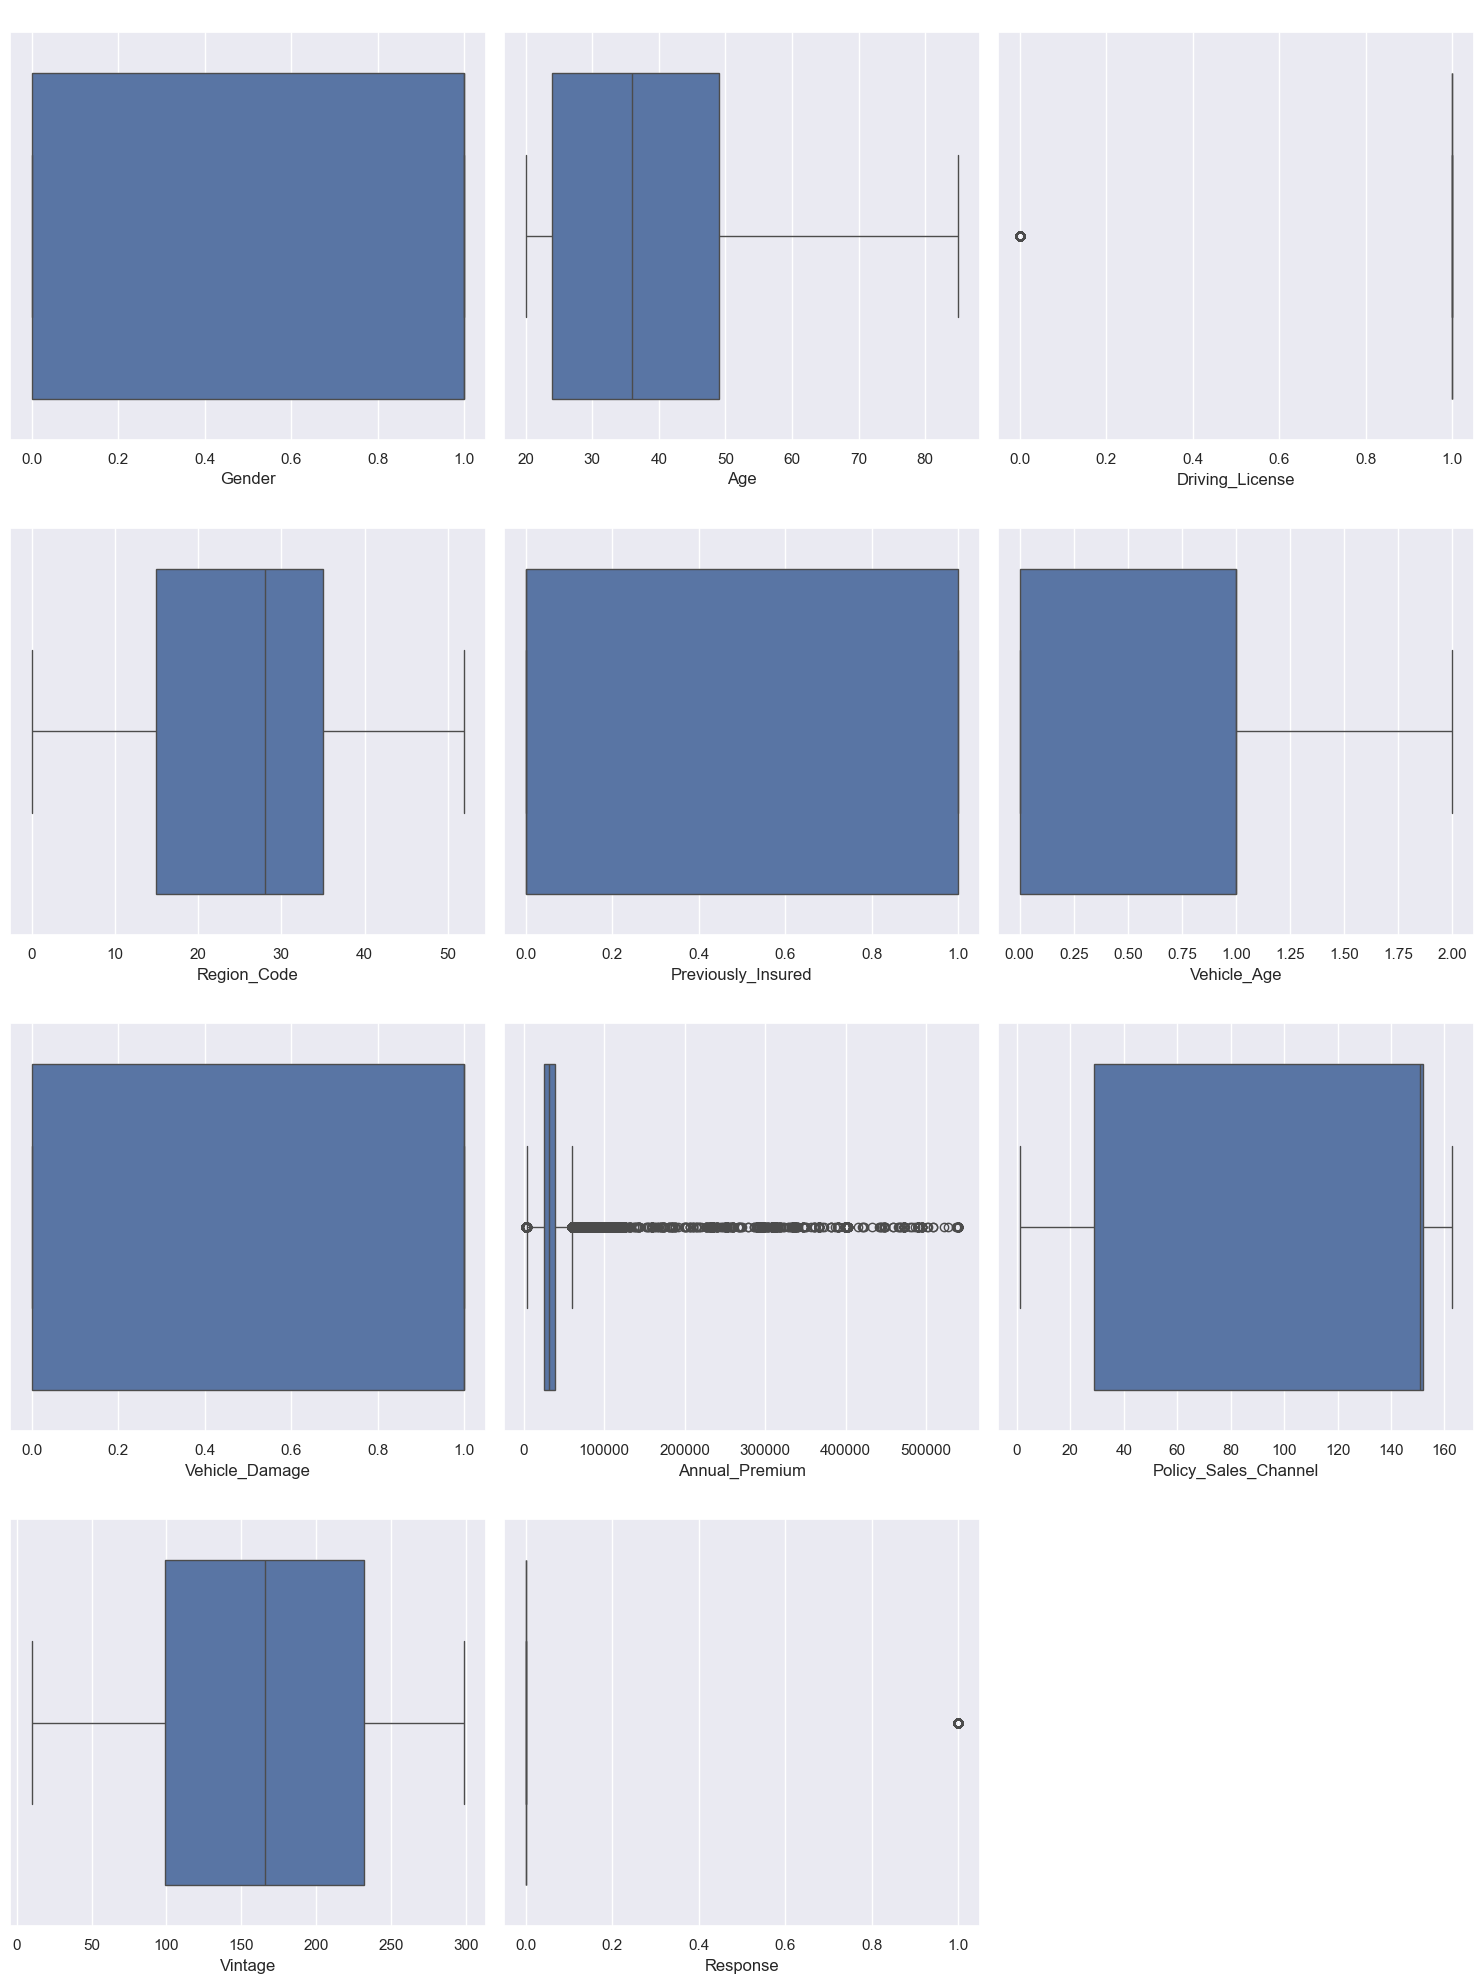

In [119]:
plt.style.use('dark_background')

sns.set(style="darkgrid")

columns_to_plot = [
    'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
    'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel',
    'Vintage', 'Response'
]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))

axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=train_df[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}', fontsize=14, color='white')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Найдем дубликаты

In [120]:
duplicates = train_df.duplicated()
num_duplicates = duplicates.sum()
print(num_duplicates)

0


Избавимся от хвостов, для этого, заменим возраст на 1, если он меньше 38 лет и 0, если больше

In [121]:
def age_category(Age):
    if Age > 38:
        return 1
    else:
        return 0

train_df['Age Above 38'] = train_df['Age'].apply(age_category)
test_df['Age Above 38'] = test_df['Age'].apply(age_category)

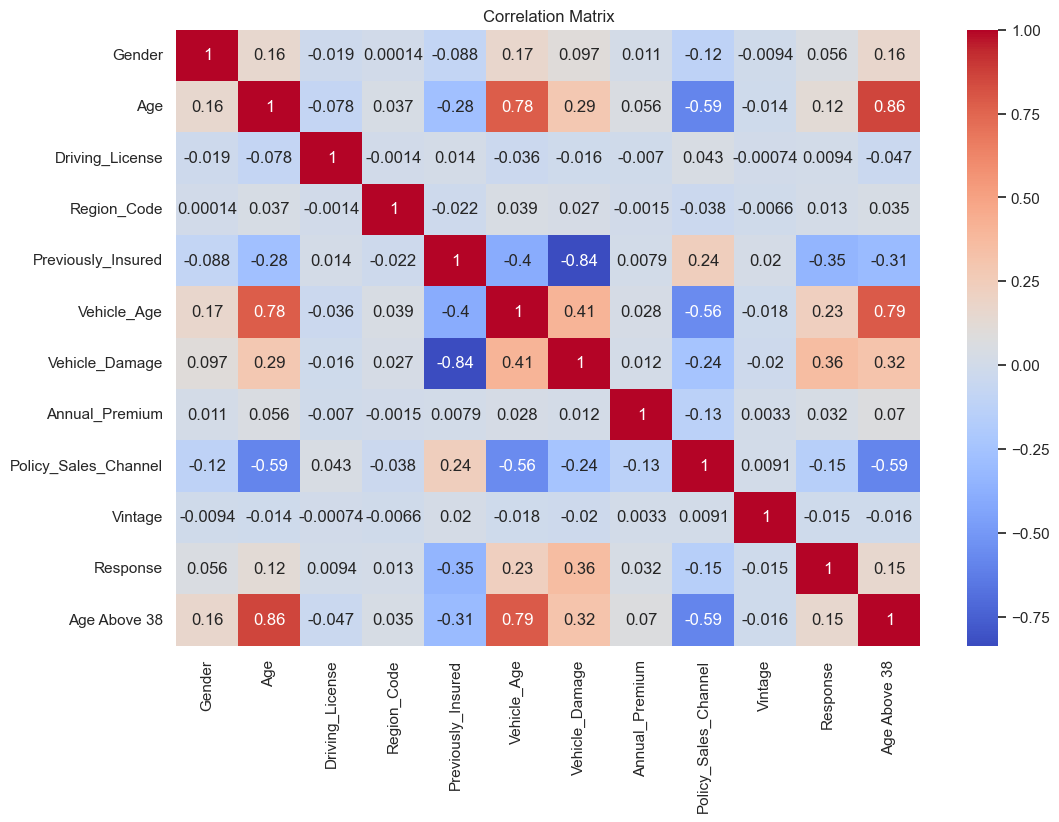

In [122]:
correlation_matrix = train_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [123]:
train_df = train_df.drop(['Age', 'Region_Code', 'Policy_Sales_Channel'], axis=1)
test_df = test_df.drop(['Age', 'Region_Code', 'Policy_Sales_Channel'], axis=1)

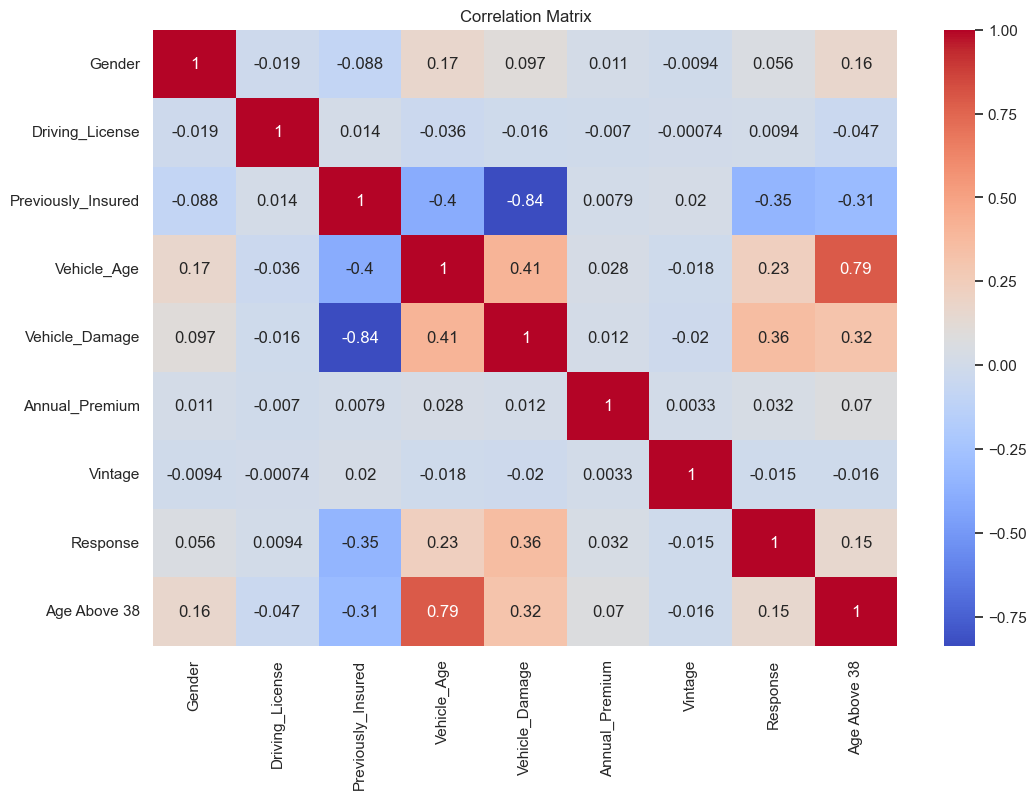

In [124]:
correlation_matrix = train_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Наблюдаем сильную корреляцию между показателями **Previously_Insured и Vehicle_Damage**. Введем новый признак - Not_Insured_and_Damage - принимающий 1, если была авария, но не был зарагистрирована машина, 0 - в других случаях

In [125]:
train_df['Not_Insured and Damaged'] = train_df['Vehicle_Damage'] * (1-train_df['Previously_Insured'])
train_df = train_df.drop(['Previously_Insured', 'Vehicle_Damage'], axis=1)

test_df['Not_Insured and Damaged'] = test_df['Vehicle_Damage'] * (1-test_df['Previously_Insured'])
test_df = test_df.drop(['Previously_Insured', 'Vehicle_Damage'], axis=1)

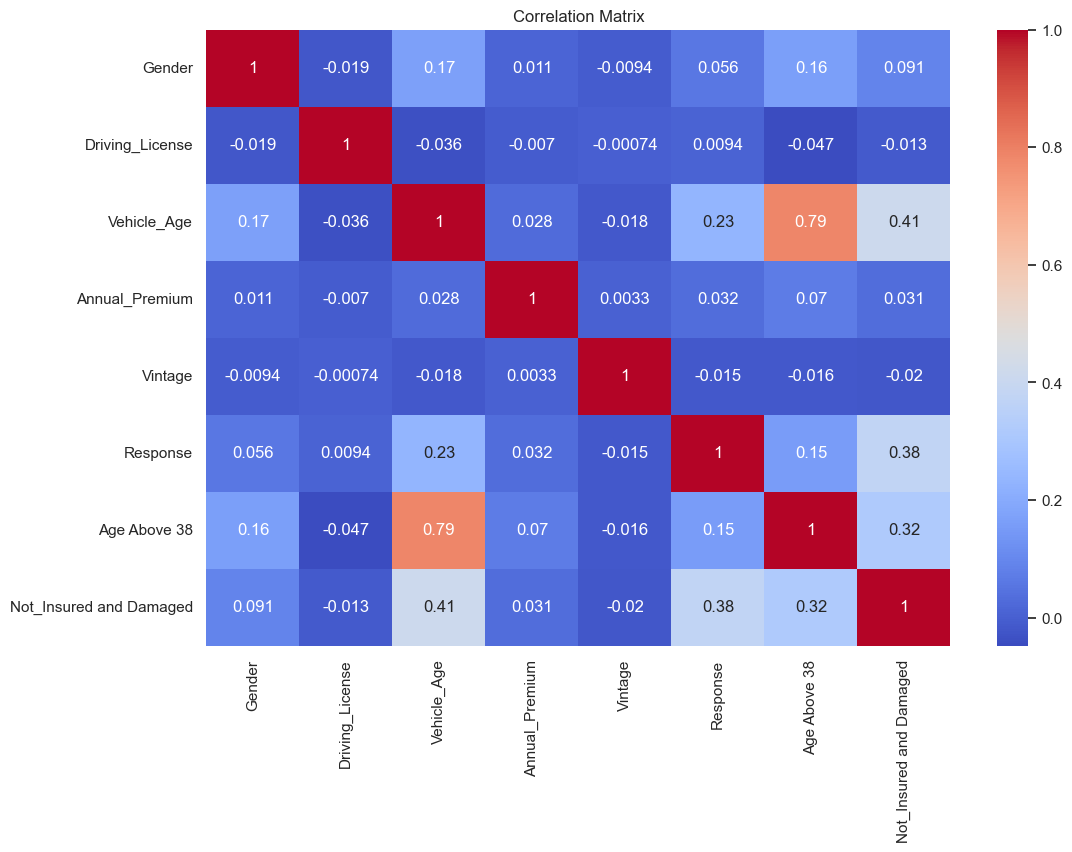

In [126]:
correlation_matrix = train_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [127]:
y_train = train_df['Response']
X_pre_train = train_df.drop(['Response'],axis=1)

y_test_final = test_df['Response']
X_pre_test_final = test_df.drop(['Response'],axis=1)


In [128]:
'''from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
X_over, y_over = smote.fit_resample(X_pre_train, y_train)
0.4
'''



'''from imblearn.under_sampling import RandomUnderSampler

# Создание экземпляра RandomUnderSampler
rus = RandomUnderSampler()

# Применение уменьшения выборки к данным
X_over, y_over = rus.fit_resample(X_pre_train, y_train)
0.4-0.41'''
from imblearn.over_sampling import RandomOverSampler

# Создание экземпляра RandomOverSampler
ros = RandomOverSampler()

# Применение увеличения выборки к данным
X_over, y_over = ros.fit_resample(X_pre_train, y_train)
'''0.4-0.41'''


y_train = y_over

In [129]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
train_df_scaler = scaler.fit_transform(X_over)

new_train_df_scaler = pd.DataFrame(train_df_scaler, columns=X_over.columns)

#test_df_scaler = scaler.fit_transform(X_pre_test)

#new_test_df_scaler = pd.DataFrame(test_df_scaler, columns=X_pre_test.columns)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(new_train_df_scaler, y_train, random_state=3, test_size=0.15)
'''
X_train = new_train_df_scaler
#X_test = new_test_df_scaler
X_test = X_pre_test'''

'\nX_train = new_train_df_scaler\n#X_test = new_test_df_scaler\nX_test = X_pre_test'

In [131]:
new_train_df_scaler

,Gender,Driving_License,Vehicle_Age,Annual_Premium,Vintage,Age Above 38,Not_Insured and Damaged
0,0.862953,0.038701,0.435229,1.999236,0.307968,-1.112988,0.662707
1,0.862953,0.038701,2.203327,1.635506,1.578030,0.898482,0.662707
2,-1.158811,0.038701,-1.332868,0.409283,1.150484,-1.112988,-1.508961
3,-1.158811,0.038701,0.435229,-1.671617,-1.087843,-1.112988,0.662707
4,-1.158811,0.038701,0.435229,0.051312,1.653479,-1.112988,-1.508961
...,...,...,...,...,...,...,...
8769431,0.862953,0.038701,2.203327,0.519284,1.691204,0.898482,0.662707
8769432,-1.158811,0.038701,0.435229,-0.069677,1.603180,-1.112988,0.662707
8769433,0.862953,0.038701,0.435229,0.960578,-1.150717,0.898482,0.662707
8769434,0.862953,0.038701,0.435229,1.141092,0.559466,0.898482,0.662707


Разделим датасет на целевую переменную и остальное

Обучение

In [132]:
from sklearn.linear_model import SGDClassifier, ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, auc, precision_recall_curve, PrecisionRecallDisplay, roc_curve

* Logistic Regression using Stochastic Gradient Descent
* ElasticNet Regression
* Random Forest with parallel Processing


In [133]:
log_sgd = SGDClassifier(loss='log_loss', max_iter=1000)
log_sgd.fit(X_train, y_train)

SGDClassifier(loss='log_loss')

In [134]:
enet = ElasticNet(alpha=0.1, l1_ratio=0.3)
enet.fit(X_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.3)

In [135]:
rf = RandomForestClassifier(n_estimators=50, 
                            max_depth=7,
                            n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=50, n_jobs=-1)

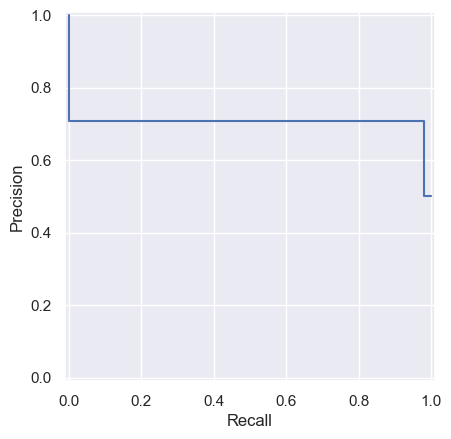

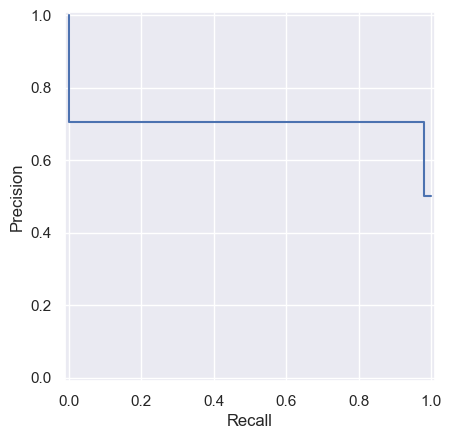

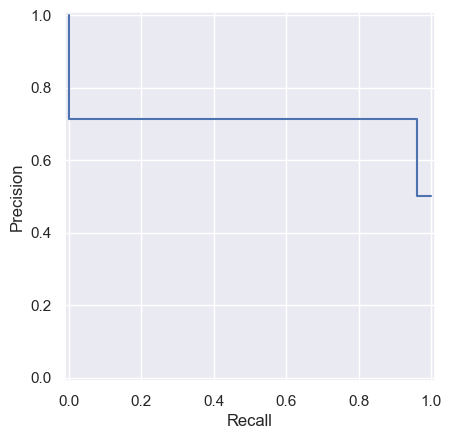

Accuracy
Logistic SGD Accuracy: 78.70%
Elastic Net Accuracy: 78.68%
Random Forest Accuracy: 78.86%
f1
Logistic SGD F1_score: 82.16%
Elastic Net F1_score: 82.16%
Random Forest F1_score: 81.99%


'print(\'auc\')\nprint(f"Logistic SGD auc: {log_sgd_auc * 100:.2f}%")\nprint(f"Elastic Net auc: {enet_auc * 100:.2f}%")\nprint(f"Random Forest auc: {rf_auc * 100:.2f}%")\n\nprint(\'precision_recall_curve\')\nprint(f"Logistic SGD precision_recall_curve: {log_sgd_precision_recall_curve}")\nprint(f"Elastic Net precision_recall_curve: {enet_precision_recall_curve * 100:.2f}%")\nprint(f"Random Forest precision_recall_curve: {rf_precision_recall_curve * 100:.2f}%")'

In [136]:
y_pred_log_sgd = log_sgd.predict(X_test)
y_pred_enet = (enet.predict(X_test) >= 0.5).astype(int)
y_pred_rf = rf.predict(X_test)

log_sgd_acc = accuracy_score(y_test, y_pred_log_sgd)
enet_acc = accuracy_score(y_test, y_pred_enet)
rf_acc = accuracy_score(y_test, y_pred_rf)

log_sgd_f1 = f1_score(y_test, y_pred_log_sgd)
enet_f1 = f1_score(y_test, y_pred_enet)
rf_f1 = f1_score(y_test, y_pred_rf)

#log_sgd_auc = auc(y_test, y_pred_log_sgd)
#enet_auc = auc(y_test, y_pred_enet)
#rf_auc = auc(y_test, y_pred_rf)

'''log_sgd_precision_recall_curve = precision_recall_curve(y_test, y_pred_log_sgd)
enet_precision_recall_curve = precision_recall_curve(y_test, y_pred_enet)
rf_precision_recall_curve = precision_recall_curve(y_test, y_pred_rf)'''

precision, recall, _ = precision_recall_curve(y_test, y_pred_log_sgd)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_pred_enet)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_pred_rf )
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

print('Accuracy')
print(f"Logistic SGD Accuracy: {log_sgd_acc * 100:.2f}%")
print(f"Elastic Net Accuracy: {enet_acc * 100:.2f}%")
print(f"Random Forest Accuracy: {rf_acc * 100:.2f}%")

print('f1')
print(f"Logistic SGD F1_score: {log_sgd_f1 * 100:.2f}%")
print(f"Elastic Net F1_score: {enet_f1 * 100:.2f}%")
print(f"Random Forest F1_score: {rf_f1 * 100:.2f}%")

'''print('auc')
print(f"Logistic SGD auc: {log_sgd_auc * 100:.2f}%")
print(f"Elastic Net auc: {enet_auc * 100:.2f}%")
print(f"Random Forest auc: {rf_auc * 100:.2f}%")

print('precision_recall_curve')
print(f"Logistic SGD precision_recall_curve: {log_sgd_precision_recall_curve}")
print(f"Elastic Net precision_recall_curve: {enet_precision_recall_curve * 100:.2f}%")
print(f"Random Forest precision_recall_curve: {rf_precision_recall_curve * 100:.2f}%")'''


Logistic Regression using Stochastic Gradient Descent


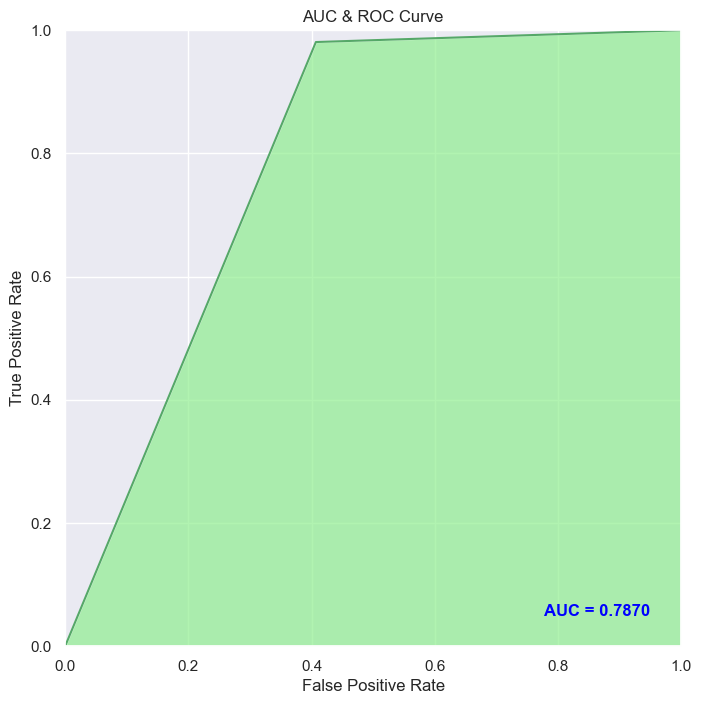

In [137]:
print('Logistic Regression using Stochastic Gradient Descent')
false_positive_rate, true_positive_rate, thresolds = roc_curve(y_test, y_pred_log_sgd)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % log_sgd_acc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

ElasticNet Regression


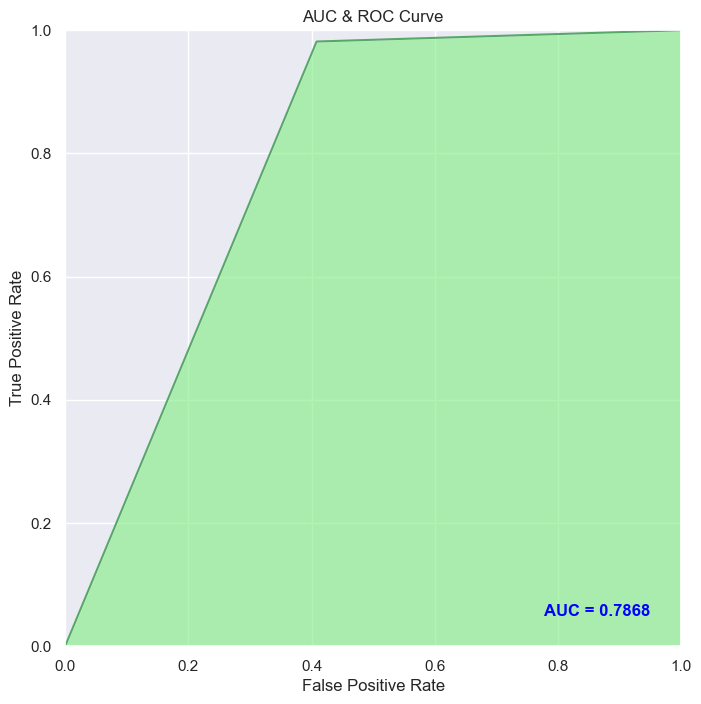

In [138]:
print('ElasticNet Regression')
false_positive_rate, true_positive_rate, thresolds = roc_curve(y_test, y_pred_enet)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % enet_acc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Random Forest with parallel Processing


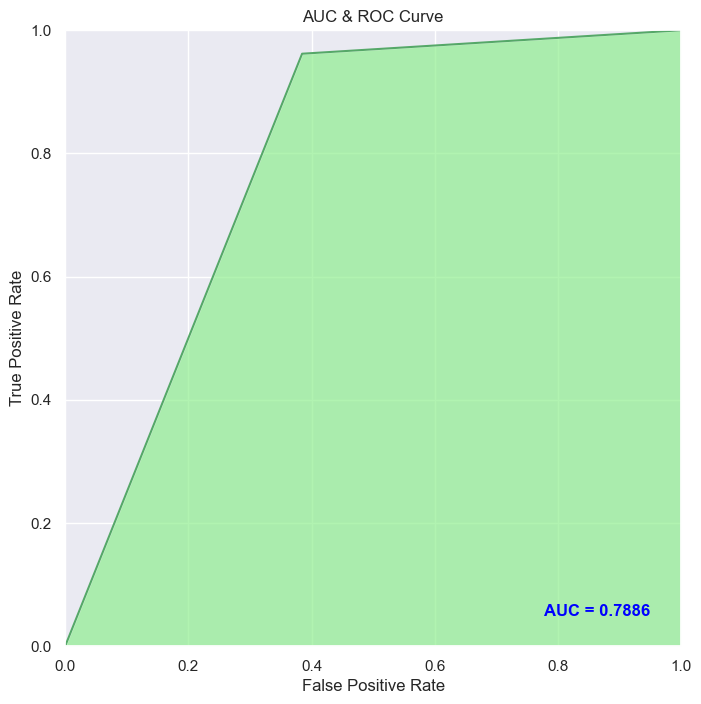

In [139]:
print('Random Forest with parallel Processing')
false_positive_rate, true_positive_rate, thresolds = roc_curve(y_test, y_pred_rf)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % rf_acc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [140]:
'''from imblearn.under_sampling import RandomUnderSampler

# Создание экземпляра RandomUnderSampler
rus = RandomUnderSampler()

# Применение уменьшения выборки к данным
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)'''

'from imblearn.under_sampling import RandomUnderSampler\n\n# Создание экземпляра RandomUnderSampler\nrus = RandomUnderSampler()\n\n# Применение уменьшения выборки к данным\nX_resampled, y_resampled = rus.fit_resample(X_train, y_train)'

In [141]:
'''from imblearn.over_sampling import RandomOverSampler

# Создание экземпляра RandomOverSampler
ros = RandomOverSampler()

# Применение увеличения выборки к данным
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)'''

'from imblearn.over_sampling import RandomOverSampler\n\n# Создание экземпляра RandomOverSampler\nros = RandomOverSampler()\n\n# Применение увеличения выборки к данным\nX_resampled, y_resampled = ros.fit_resample(X_train, y_train)'

In [142]:
'''from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight

# Получение весов классов
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Создание модели с взвешиванием классов
model = RandomForestClassifier(n_estimators=100, 
                            max_depth=7,
                            n_jobs=-1,
                            class_weight=dict(enumerate(class_weights)))'''

"from sklearn.ensemble import RandomForestClassifier\nfrom sklearn.utils.class_weight import compute_class_weight\n\n# Получение весов классов\nclass_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)\n\n# Создание модели с взвешиванием классов\nmodel = RandomForestClassifier(n_estimators=100, \n                            max_depth=7,\n                            n_jobs=-1,\n                            class_weight=dict(enumerate(class_weights)))"

In [143]:
test_df_scaler = scaler.fit_transform(X_pre_test_final)

new_test_df_scaler = pd.DataFrame(test_df_scaler, columns=X_pre_test_final.columns)

y_test_predict = log_sgd.predict(new_test_df_scaler)
log_sgd_f1 = f1_score(y_test_final , y_test_predict)
print(f"Logistic SGD F1_score: {log_sgd_f1 * 100:.2f}%")

Logistic SGD F1_score: 40.15%
